In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
tf.__version__

'2.2.0'

In [0]:
model = tf.keras.applications.ResNet50(weights='imagenet')


In [3]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [4]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [0]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [0]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(9, activation ='softmax')(x)

In [7]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [8]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [0]:
for layer in model.layers[:175]:
  layer.trainable = False

In [0]:
for layer in model.layers[175:]:
  layer.trainable = True

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)


In [12]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp "/content/drive/My Drive/SkinDataset/Skin_dataset.zip" "Skin_dataset.zip"

In [14]:
!unzip Skin_dataset.zip

Archive:  Skin_dataset.zip
replace New_Dataset/train/Eczema/eczema-hand-91.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: New_Dataset/train/Eczema/eczema-hand-91.jpg  
  inflating: New_Dataset/train/Eczema/eczema-hand-80.jpg  
  inflating: New_Dataset/train/Eczema/eczema-hand-81.jpg  
  inflating: New_Dataset/train/Eczema/Dyshidrosis-38.jpg  
  inflating: New_Dataset/train/Eczema/Eczema (Dermatitis).jpg  
  inflating: New_Dataset/train/Eczema/eczema-acute-20.jpg  
  inflating: New_Dataset/train/Eczema/eczema-arms-10.jpg  
  inflating: New_Dataset/train/Eczema/eczema-arms-9.jpg  
  inflating: New_Dataset/train/Eczema/eczema-asteatotic-1.jpg  
  inflating: New_Dataset/train/Eczema/eczema-asteatotic-11.jpg  
  inflating: New_Dataset/train/Eczema/eczema-asteatotic-16.jpg  
  inflating: New_Dataset/train/Eczema/eczema-asteatotic-21.jpg  
  inflating: New_Dataset/train/Eczema/eczema-asteatotic-22.jpg  
  inflating: New_Dataset/train/Eczema/eczema-asteatotic-24.jpg  
  inflating: N

In [15]:
train_generator = train_datagen.flow_from_directory('/content/New_Dataset/train', 
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 289 images belonging to 9 classes.


In [0]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
history = model.fit_generator(generator = train_generator, steps_per_epoch=train_generator.n//train_generator.batch_size, epochs = 12)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/12
9/9 [==============================] - 34s 4s/step - loss: 2.8627 - accuracy: 0.2568
Epoch 2/12
9/9 [==============================] - 34s 4s/step - loss: 1.4330 - accuracy: 0.4981
Epoch 3/12
9/9 [==============================] - 34s 4s/step - loss: 1.1884 - accuracy: 0.5798
Epoch 4/12
9/9 [==============================] - 38s 4s/step - loss: 0.8883 - accuracy: 0.7121
Epoch 5/12
9/9 [==============================] - 34s 4s/step - loss: 0.8214 - accuracy: 0.6576
Epoch 6/12
9/9 [==============================] - 34s 4s/step - loss: 0.5001 - accuracy: 0.8093
Epoch 7/12
9/9 [==============================] - 34s 4s/step - loss: 0.7767 - accuracy: 0.7549
Epoch 8/12
9/9 [==============================] - 34s 4s/step - loss: 0.5812 - accuracy: 0.7665
Epoch 9/12
9/9 [==============================] - 34s 4s/step - loss: 0.3013 - accuracy: 0.8833
Epoch 10/12
9/9 [==============================] - 34s 4s/st

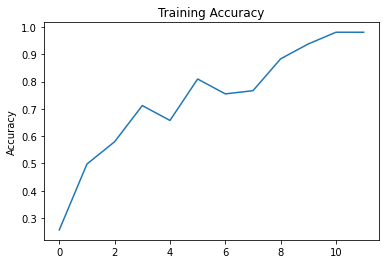

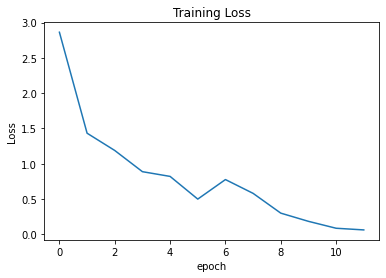

In [25]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
!cp /content/New_Dataset/validation/Warts/warts-common-17.jpg /content/

In [0]:
from keras.preprocessing import image

In [0]:
Sample_Image = image.load_img('warts-common-17.jpg', target_size=(224, 224))

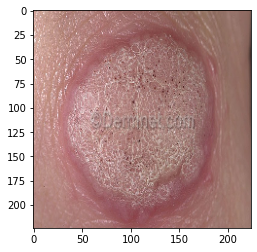

In [36]:
plt.imshow(Sample_Image)

In [0]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)


In [38]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)

Predictions: [[6.9892039e-08 1.0530823e-05 7.7466990e-05 3.6752169e-06 1.7669789e-08
  2.7371749e-05 4.0856583e-04 5.8325240e-06 9.9946648e-01]]
